In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, cluster, silhouette_samples, silhouette_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
import seaborn as sns

In [56]:
data_dir = "./../Data/archive1/"
data = pd.read_csv(data_dir + "covid-19 symptoms dataset.csv")

In [57]:
label = data["infectionProb"]

In [58]:
data

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,102,0,9,0,-1,0
1,102,0,10,0,0,1
2,104,0,33,1,-1,0
3,101,1,59,0,1,0
4,99,0,98,0,0,0
...,...,...,...,...,...,...
2570,99,0,90,0,0,1
2571,100,0,53,0,-1,1
2572,101,0,44,1,0,0
2573,102,0,97,0,-1,1


In [59]:
data1 = data.drop("infectionProb", axis=1, inplace = False)

# Data Visalisation

<AxesSubplot:xlabel='diffBreath', ylabel='count'>

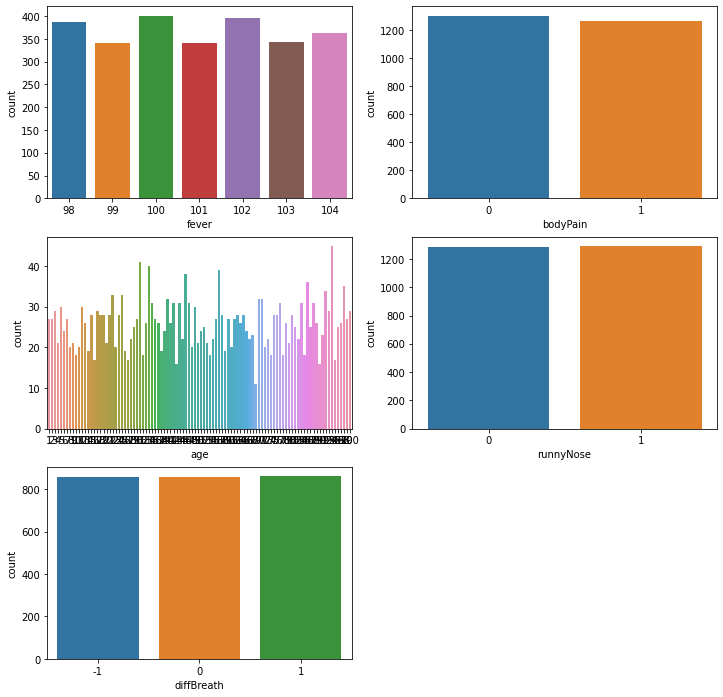

In [75]:
plt.figure(figsize=[12,12])
plt.subplot(321)
sns.countplot(x= "fever", data= data)
plt.subplot(322)
sns.countplot(x= "bodyPain", data= data)
plt.subplot(323)
sns.countplot(x= "age", data= data)
plt.subplot(324)
sns.countplot(x= "runnyNose", data= data)
plt.subplot(325)
sns.countplot(x= "diffBreath", data= data)

<AxesSubplot:xlabel='diffBreath', ylabel='count'>

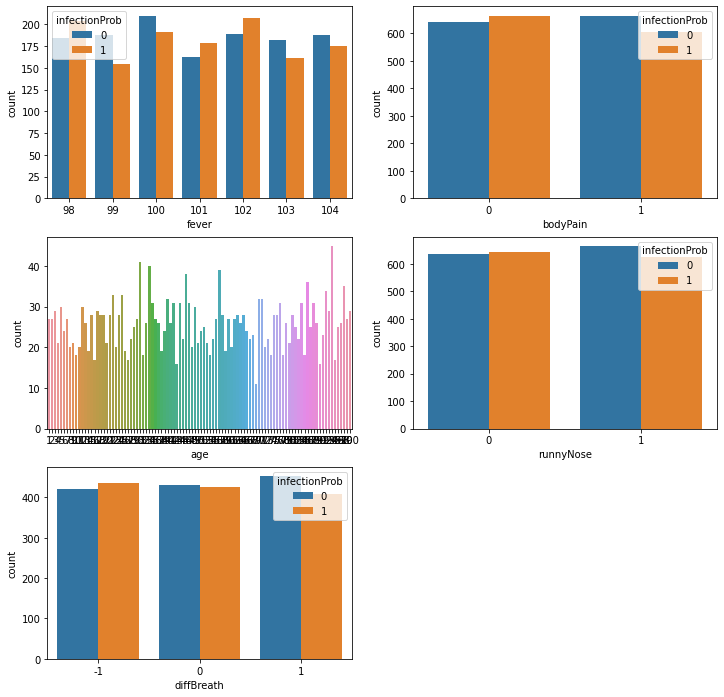

In [76]:
plt.figure(figsize=[12,12])
plt.subplot(321)
sns.countplot(x= "fever",hue = "infectionProb", data= data)
plt.subplot(322)
sns.countplot(x= "bodyPain",hue = "infectionProb", data= data)
plt.subplot(323)
sns.countplot(x= "age", data= data)
plt.subplot(324)
sns.countplot(x= "runnyNose",hue = "infectionProb", data= data)
plt.subplot(325)
sns.countplot(x= "diffBreath",hue = "infectionProb", data= data)

<AxesSubplot:>

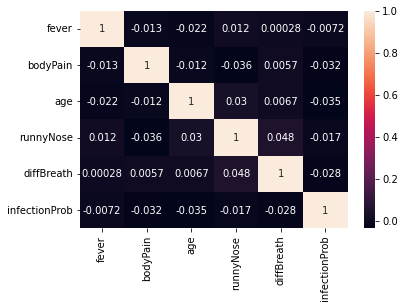

In [81]:
sns.heatmap(data.corr(), annot=True)

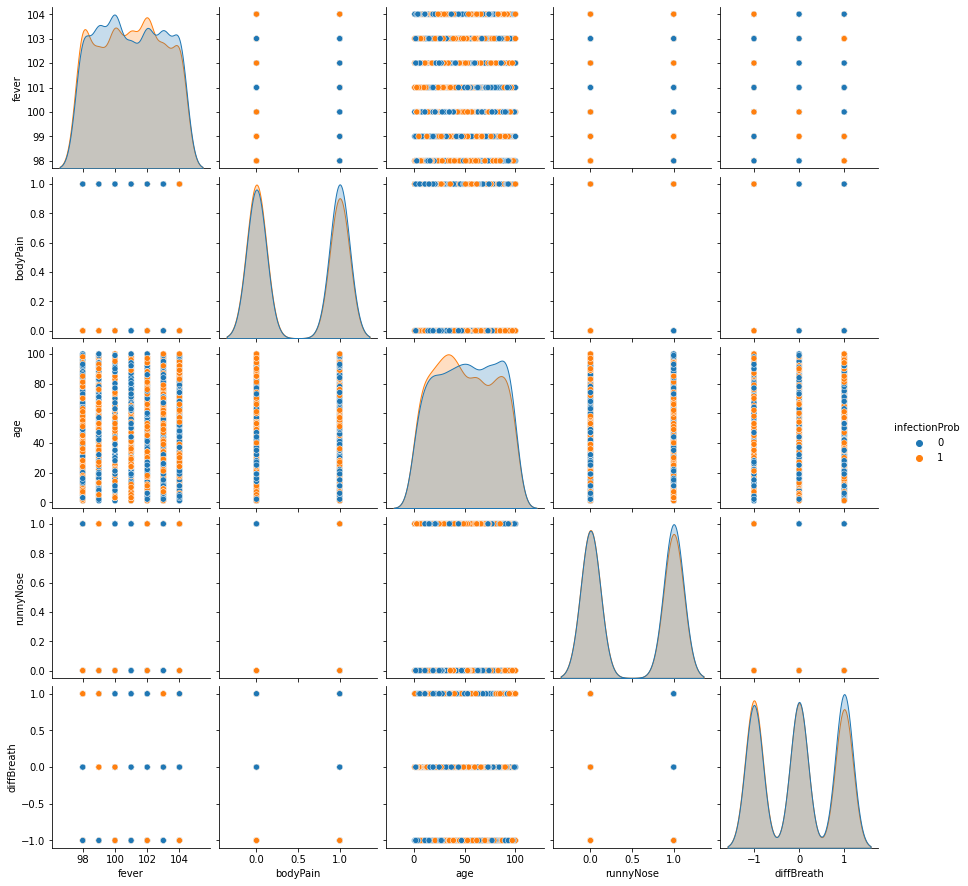

In [82]:
sns.pairplot(data, hue = "infectionProb", vars = ["fever","bodyPain","age","runnyNose","diffBreath"])

<AxesSubplot:xlabel='runnyNose', ylabel='count'>

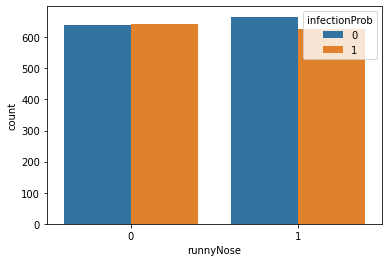

In [67]:
sns.countplot(x= "runnyNose",hue = "infectionProb", data= data)

<AxesSubplot:xlabel='diffBreath', ylabel='count'>

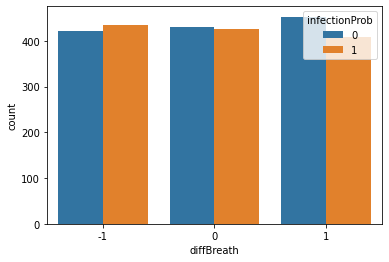

In [66]:
sns.countplot(x= "diffBreath",hue = "infectionProb", data= data)

<AxesSubplot:xlabel='diffBreath', ylabel='count'>

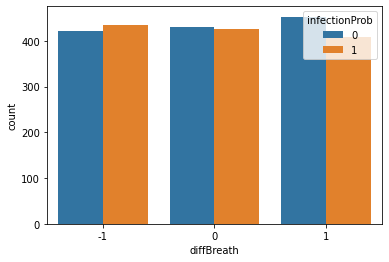

In [65]:
sns.countplot(x= "diffBreath", hue = "infectionProb", data= data)

<AxesSubplot:>

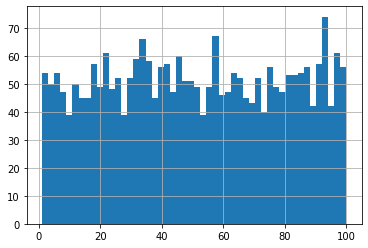

In [79]:
data["age"].hist(bins = 50)

In [13]:
scaled_data = scale(data)

In [97]:
scaled_data

array([[ 0.51530482, -0.98573283, -1.44863938, -1.00428101, -1.22712718],
       [ 0.51530482, -0.98573283, -1.41416709, -1.00428101, -0.00285268],
       [ 1.51561383, -0.98573283, -0.62130444,  0.99573724, -1.22712718],
       ...,
       [ 0.01515031, -0.98573283, -0.24210926,  0.99573724, -0.00285268],
       [ 0.51530482, -0.98573283,  1.58492206, -1.00428101, -1.22712718],
       [ 1.51561383,  1.01447366,  0.37839194,  0.99573724, -1.22712718]])

In [92]:
model = KMeans(n_clusters=3, random_state=40)

In [93]:
model.fit(scaled_data)

KMeans(n_clusters=3, random_state=40)

In [94]:
model.labels_

array([0, 0, 2, ..., 2, 0, 1])

In [95]:
silhouette_score(scaled_data, model.labels_)

0.19891007639644687

# Multiple

In [40]:
kmeans_multiple = [KMeans(n_clusters=k, random_state=50).fit(scaled_data) for k in range(1, 50)]
silhouette_scores = [silhouette_score(scaled_data, model.labels_) for model in kmeans_multiple[1:]]

In [41]:
silhouette_scores

[0.2095989845494146,
 0.18022048185524325,
 0.26026558053410087,
 0.23053301363225603,
 0.22994266990565496,
 0.23360377751805042,
 0.23539433924807243,
 0.23420953844557701,
 0.23966460124837177,
 0.24323284574172468,
 0.24587974303388355,
 0.2506958985396312,
 0.2663493208784641,
 0.2740155382907552,
 0.27675087169887264,
 0.27913681804877066,
 0.2834881519330254,
 0.2867714064632057,
 0.2859523314330583,
 0.2911315969659102,
 0.29480635439013886,
 0.30805605439171696,
 0.3079475830251078,
 0.30583927203342093,
 0.3112878004323152,
 0.31141105336677666,
 0.31371304714434217,
 0.3125230518645433,
 0.31930452763762074,
 0.3149719671449494,
 0.31216446291103256,
 0.3178590893234061,
 0.32406366094441463,
 0.3316445547351519,
 0.33259332641070444,
 0.33101371450707123,
 0.33282845999612587,
 0.33708393969056777,
 0.33767575823239243,
 0.3377912984189233,
 0.3398574232187689,
 0.3488373559865036,
 0.34903126650456184,
 0.3443868346061243,
 0.3411721290775248,
 0.3508878725821907,
 0.34863

Text(0, 0.5, 'Silk Co-efficient')

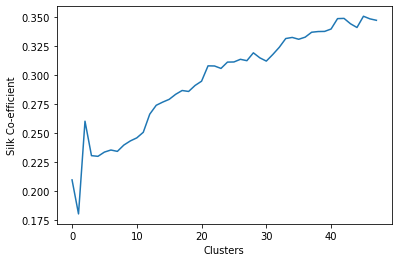

In [43]:
plt.plot(silhouette_scores)
plt.xlabel("Clusters")
plt.ylabel("Silk Co-efficient")